# Modeling procedure for structured data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.4.0


In [3]:
df_train = pd.read_csv('../data/titanic/train.csv')
df_test = pd.read_csv('../data/titanic/test.csv')

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


In [5]:
df_test.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
1,405,0,3,"Oreskovic, Miss. Marija",female,20.00,0,0,315096,8.6625,NaN,S
2,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S
3,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
4,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
5,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.00,0,0,240929,12.6500,NaN,S
6,481,0,3,"Goodwin, Master. Harold Victor",male,9.00,5,2,CA 2144,46.9000,NaN,S
7,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
8,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
9,811,0,3,"Alexander, Mr. William",male,26.00,0,0,3474,7.8875,NaN,S


In [6]:
print(df_train.shape)
print(df_test.shape)

(712, 12)
(179, 12)


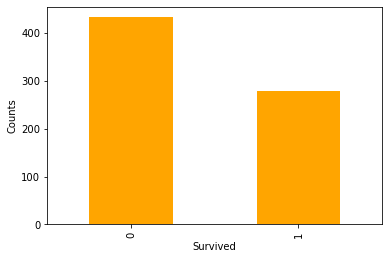

In [7]:
%config InlineBackend.figure_format = 'png'
plt.figure(figsize=(6, 4))
ax = df_train.Survived.value_counts().plot(kind = 'bar', color = 'orange')

ax.set_xlabel('Survived', fontsize = 10)
ax.set_ylabel('Counts', fontsize = 10)
plt.show()

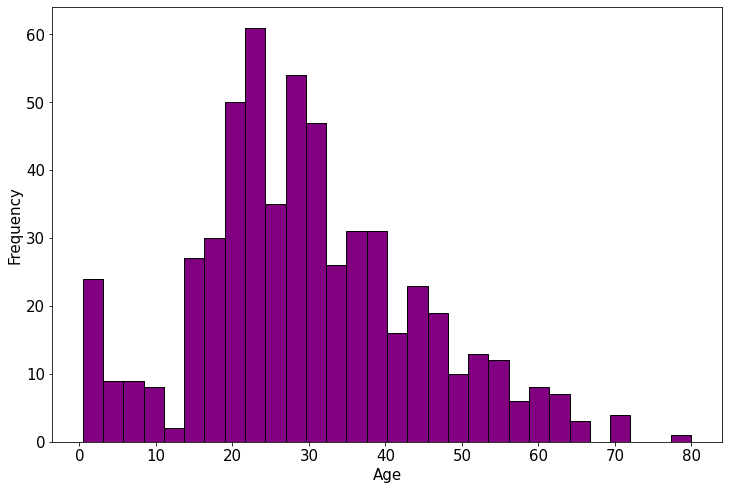

In [10]:
%config InlineBackend.figure_format = 'png'
ax = df_train['Age'].plot(kind = 'hist', bins = 30, color= 'purple', edgecolor = 'black', figsize = (12,8), fontsize= 15)

ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

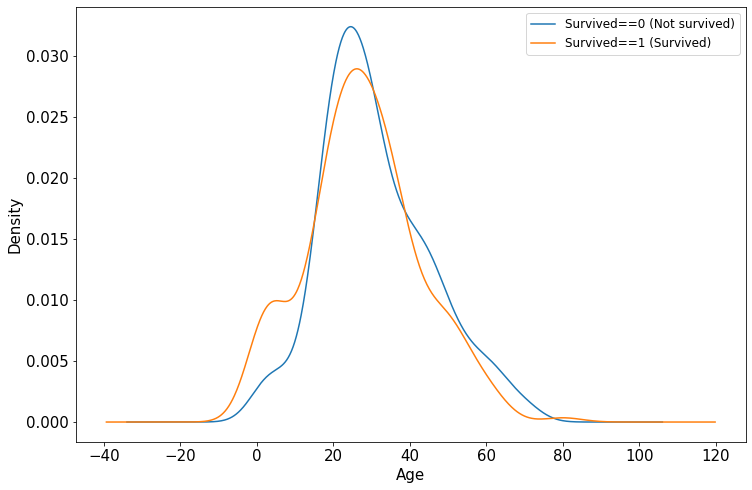

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

ax = df_train.query('Survived == 0')['Age'].plot(kind = 'density', figsize = (12,8), fontsize=15)
ax = df_train.query('Survived == 1')['Age'].plot(kind = 'density', figsize = (12,8), fontsize=15)

ax.legend(['Survived==0 (Not survived)', 'Survived==1 (Survived)'],fontsize = 12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

In [12]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            146
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          544
Embarked         2
dtype: int64

In [13]:
df_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             31
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          143
Embarked         0
dtype: int64

In [ ]:
def preprocesing(dfdata):
    dfresult = pd.DataFrame()
    
    #Pclass
    dfpclass = pd.get_dummies(data = dfdata, columns = Pclass)
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns]
    dfresult = pd.concat([dfresult, Pclass], axis=1)
    
    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)
    
    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')
    
    